## Atabey's Notes

- Q1: Looks fine
- Q2: I liked the fact that you have used two different classifiers. Looks fine.
- Q3: Looks ok
- Q4: Looks ok
- Q5: not much is done

20 + 20 + 20 + 20 = 80

# Homework #4

## Overall rules:

- Refrain from saving datasets locally. You may experiment with your answers on a locally saved version of the datasets, but do not upload your local files with your homework as the datasets are very large. In your submitted answers datasets should be read from the original source URL.
- Document all of your steps by writing appropriate markdown cells in your notebook. Refrain from using code comments to explain what has been done. 
- Avoid duplicating code. Do not copy and paste code from one cell to another. If copying and pasting is necessary, write a suitable function for the task at hand and call that function.
- Document your use of LLM models (ChatGPT, Claude, Code Pilot etc). Either take screenshots of your steps and include them with this notebook, or give me a full log (both questions and answers) in a markdown file named `HW4-LLM-LOG.md`.

Failure to adhere to these guidelines will result in a 25-point deduction for each infraction.



### Eren Tümkaya -  090190328  

In [199]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as ny
from xmltodict import parse
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import networkx as nx
import gravis as gv
import matplotlib.pyplot as plt
from itertools import combinations

import os
import librosa
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import resampy  
from sklearn.svm import SVC
from xgboost import XGBClassifier



## Q1 (Author attribution)


### Getting the Data

I will be doing web scraping for this task. I will use the "requests" library and get the text from "https://www.gutenberg.org/cache/epub/1260/pg1260.txt" (For Jayne Eyre)

I will do the same for "Pride and Prejudice". 
[chat](https://chat.openai.com/share/50d1c002-d116-4edc-b35d-a330e9cd658f)

When I check both of the files, it is clear that there are the initial parts and the last parts which are not related to the story. I will define a function and only obtain the text between "chapter I" and "*** END OF THE PROJECT GUTENBERG EBOOK" .


In [28]:
response= requests.get('https://www.gutenberg.org/cache/epub/1260/pg1260.txt')
response.text

'\ufeffThe Project Gutenberg eBook of Jane Eyre: An Autobiography\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: Jane Eyre: An Autobiography\r\n\r\n\r\nAuthor: Charlotte Brontë\r\n\r\nIllustrator: F. H. Townsend\r\n\r\nRelease date: March 1, 1998 [eBook #1260]\r\n                Most recently updated: May 2, 2023\r\n\r\nLanguage: English\r\n\r\nCredits: David Price\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK JANE EYRE: AN AUTOBIOGRAPHY ***\r\n\r\n\r\n\r\nJANE EYRE\r\nAN AUTOBIOGRAPHY\r\n\r\nby Charlotte Brontë\r\n\r\n_ILLUSTRATED BY F. H. TOWNSEND

Just like I stated earlier, I will only need some parts. Hence I am defining a function to be able to use it for both. I got some aid from an llm as well. As it can be clearly seen above, I also need to get rid of "\r\n" expressions.  

Inside this function, I will also perform my sentence tokenization. I used our [lecture 9](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-09.ipynb) as my guide most of the time. Just like we did at class, I cleared my text from all non word elements and lowered each letterç

In [40]:
import requests

def get_text_between_sentences(url, start_sentence, end_sentence):
    
    response = requests.get(url)

    
    if response.status_code == 200:
      
        page_content = response.text

        
        start_index = page_content.find(start_sentence)
        end_index = page_content.find(end_sentence, start_index + len(start_sentence))
        
       
        extracted_text = page_content[start_index + len(start_sentence):end_index].strip()
        extracted_text = extracted_text.replace("\r\n", " ")
        
        sentences = sent_tokenize(extracted_text)
        processed_sentences = [re.sub(r'[^\w\s]+', '', sentence.lower()) for sentence in sentences]
        return processed_sentences
    

I looked at where the novel starts and where it ends on the page since they are my inputs for my function. I will get the processed sentences for "Jane Eyre".

In [41]:
Jayne_Eyre_text=get_text_between_sentences("https://www.gutenberg.org/cache/epub/1260/pg1260.txt", "_April_ 13_th_, 1848.", "*** END OF THE PROJECT GUTENBERG EBOOK JANE EYRE: AN AUTOBIOGRAPHY ***")

In [42]:
Jayne_Eyre_text

['chapter i   there was no possibility of taking a walk that day',
 'we had been wandering indeed in the leafless shrubbery an hour in the morning but since dinner mrs reed when there was no company dined early the cold winter wind had brought with it clouds so sombre and a rain so penetrating that further outdoor exercise was now out of the question',
 'i was glad of it i never liked long walks especially on chilly afternoons dreadful to me was the coming home in the raw twilight with nipped fingers and toes and a heart saddened by the chidings of bessie the nurse and humbled by the consciousness of my physical inferiority to eliza john and georgiana reed',
 'the said eliza john and georgiana were now clustered round their mama in the drawingroom she lay reclined on a sofa by the fireside and with her darlings about her for the time neither quarrelling nor crying looked perfectly happy',
 'me she had dispensed from joining the group saying she regretted to be under the necessity of ke

I believe it looks fine. Now I will do the same for "Pride_and_Prejudice"

In [43]:
Pride_and_Prejudice_text=get_text_between_sentences("https://www.gutenberg.org/cache/epub/1342/pg1342.txt", "Chapter I.]", "*** END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***")

In [44]:
Pride_and_Prejudice_text

['it is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife',
 'however little known the feelings or views of such a man may be on his first entering a neighbourhood this truth is so well fixed in the minds of the surrounding families that he is considered as the rightful property of some one or other of their daughters',
 'my dear mr bennet said his lady to him one day have you heard that netherfield park is let at last  mr bennet replied that he had not',
 'but it is returned she for mrs long has just been here and she told me all about it  mr bennet made no answer',
 'do not you want to know who has taken it cried his wife impatiently',
 '_you_ want to tell me and i have no objection to hearing it  illustration  he came down to see the place  _copyright 1894 by george allen_  this was invitation enough',
 'why my dear you must know mrs long says that netherfield is taken by a young man of large fortune from the north of englan

I will create a two columned data frame. For "Jayne-Eyre" I will label the Author column as "1".

In [47]:
Jayne_df=pd.DataFrame({"text_sentences": Jayne_Eyre_text})
Jayne_df["Author"]=1

In [48]:
Jayne_df

,text_sentences,Author
0,chapter i there was no possibility of taking...,1
1,we had been wandering indeed in the leafless s...,1
2,i was glad of it i never liked long walks espe...,1
3,the said eliza john and georgiana were now clu...,1
4,me she had dispensed from joining the group sa...,1
...,...,...
6805,i know that a strangers hand will write to me ...,1
6806,and why weep for this,1
6807,no fear of death will darken st johns last hou...,1
6808,his own words are a pledge of this my master ...,1


Doing the same for "Pride_and_Prejudice" but labeling the author as "0" this time.

In [49]:
Pride_df=pd.DataFrame({"text_sentences": Pride_and_Prejudice_text})
Pride_df["Author"]=0

In [50]:
Pride_df

,text_sentences,Author
0,it is a truth universally acknowledged that a ...,0
1,however little known the feelings or views of ...,0
2,my dear mr bennet said his lady to him one day...,0
3,but it is returned she for mrs long has just b...,0
4,do not you want to know who has taken it cried...,0
...,...,...
4651,lady catherine was extremely indignant on the ...,0
4652,but at length by elizabeths persuasion he was ...,0
4653,with the gardiners they were always on the mos...,0
4654,darcy as well as elizabeth really loved them a...,0


I will use "pd.concat" to combine these two frames. 

In [51]:
merged_df = pd.concat([Jayne_df, Pride_df], ignore_index=True)

In [52]:
merged_df

,text_sentences,Author
0,chapter i there was no possibility of taking...,1
1,we had been wandering indeed in the leafless s...,1
2,i was glad of it i never liked long walks espe...,1
3,the said eliza john and georgiana were now clu...,1
4,me she had dispensed from joining the group sa...,1
...,...,...
11461,lady catherine was extremely indignant on the ...,0
11462,but at length by elizabeths persuasion he was ...,0
11463,with the gardiners they were always on the mos...,0
11464,darcy as well as elizabeth really loved them a...,0


### Vectorizing and Removing Stop Words

First I choose my vectorizer to be the count vectorizer.  
At this very step, I have to mention that I tried both the idf and the count vectorizer to perform this fitting. Count vectorizer gave me better results in general. Tbh I was surprised by this fact. I continued by using the count one. I also removed the stopwords.

In [71]:
vectorizer = CountVectorizer(stop_words=list(stopwords.words('english')))
X = vectorizer.fit_transform(merged_df["text_sentences"])

### Training the Model

I set the test size to 0.25 just like I was tasked and did my split. Then I trained my linear regression model.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,merged_df["Author"], test_size=0.25)
model = LR(max_iter=2500, solver='liblinear').fit(X_train,y_train)
y_predict = model.predict(X_test)

Lastly, I created a confusion matrix to show correct prediction ratios for each class.

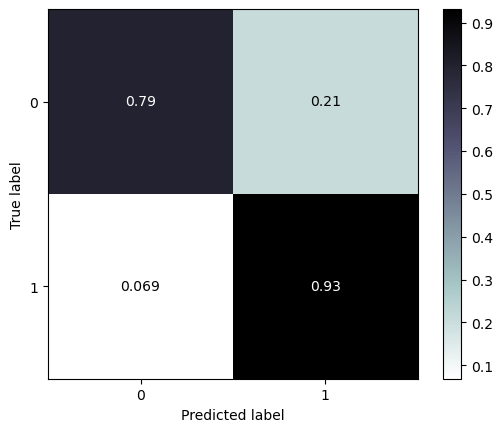

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, normalize='true', cmap='bone_r')

Altough this is only one training and it doesn't mean that my model is statistically backed, I believe it did a good job. 

It is interesting to see that the model is having more difficult time predicting the Pride and Prejudice's correct class. I believe I know why this is the case: My pride_df consisted of 4656 rows but Jayne_Df on the other hand consisted of 6810 rows. That basically means that, when I concatonated those two frames there were a lot more rows from Jayne Eyre, which most likely resulted in more Jayne Eyre in the training set. Again, this is a concept which was covered in our class. We need to be careful about these number when evaluating a model.


## Q2 (Voice recognition)


### Pulling the Data

I went to this [site](https://zenodo.org/records/1218979) and downloaded the files to my local device.

I wanted them to have a nice order in terms of file locations since I wanted to pull them with for loops. Well, the first problem I encountered was the file of the second speaker. It included some blank files inside. I deleted them. Now I had 72 files for each of the people and inside each file, there was their voices. All of the file names were indicative of the number of the person. That was important because I am going to use the file names as labels in my machine learning model.

 ### Random Forest Classifier

The first alghorithm I will be using is "random forest" .I am adding my LLM aid to the llm.hw4 file. It gave me clear answers for the most part. Still I needed to ask many questions. All of them are documented of course. 


In [193]:



def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

main_dir = "C:\\EREN\\Datasets\\Voice_dataset"

features = []
labels = []


for sub_dir in os.listdir(main_dir):
    sub_dir_path = os.path.join(main_dir, sub_dir)
    
    if os.path.isdir(sub_dir_path):
        for filename in os.listdir(sub_dir_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(sub_dir_path, filename)
                label = sub_dir 
                features.append(extract_features(file_path))
                labels.append(label)


encoded_labels = labels



max_sample_rate = max(librosa.get_samplerate(os.path.join(sub_dir_path, filename)) for filename in os.listdir(sub_dir_path))
features_normalized = [librosa.resample(f, orig_sr=librosa.get_samplerate(os.path.join(sub_dir_path, filename)), target_sr=max_sample_rate) for f in features]


X_train, X_test, y_train, y_test = train_test_split(features_normalized, encoded_labels, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=9)
clf.fit(X_train, y_train)


predictions = clf.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.82%


I will only be showing a small part of the confusion matrix. Since I have 72 classes, it wouldnt be wise for me to try showing all of them. Again, I had some chat with my llm and I am adding it to the file.

Also, I am defining a function to do it because I will create another confusion matrix later.

In [201]:
def show_the_Sub_Conf_Matrix(predictions__):
    conf_matrix = confusion_matrix(y_test, predictions__)


    subset_labels = np.unique(labels)[:10]
    subset_conf_matrix = conf_matrix[:10, :10]


    disp = ConfusionMatrixDisplay(confusion_matrix=subset_conf_matrix, display_labels=subset_labels)
    disp.plot(cmap='bone_r', values_format=".2f", colorbar=True)
    plt.title('Subset of Confusion Matrix')
    plt.show()

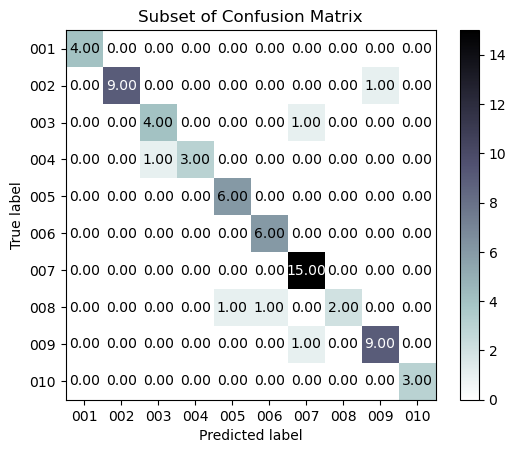

In [202]:
show_the_Sub_Conf_Matrix(predictions)

### Using SVC as my ML Alghorithm

This time, I wanted to change my model and see if I can improve my accuracy.

In [203]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)


predictions2 = clf.predict(X_test)


accuracy2 = accuracy_score(y_test, predictions2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

Accuracy: 76.65%


Once again, I wanted to see the confusion matrix.

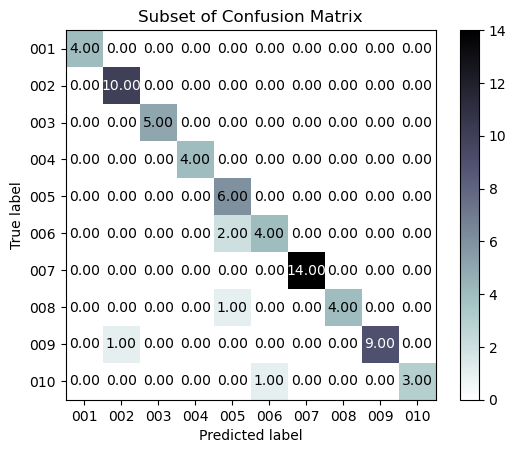

In [204]:
show_the_Sub_Conf_Matrix(predictions2)

To be honest, I expected more accurate predictions from both of the models. However I need to be clear on the fact that I don't have many experience on dealing with this type of data. I will learn more and try to do more exercises.

## Q3 (City Hopping)

I started by getting more info about the documentation of this [site](https://openflights.org/data#route). I found the two datasets that I needed. First one is the ones showing the routes. 

In [5]:
routes=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",header=None)

In [6]:
routes

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


Upon reading the documentation, I realised that there is a column indicating the stops of that spesific route. Well, since I want to know about each connected city I don't think I should include the ones where they have stops. I will filter my frame accordingly. Moreover, most of these columns are no use to me. I will select the ones neccesary and move on.

One important thing to note here, I kept the "Airport ID" column for this analysis. Reason for that is the fact that it is a unique identifier which I can use to merge it with the "airport" dataset in order to get the city.  

In [14]:
routes=routes[[3,5,7]]
routes

,3,5,7
0,2965,2990,0
1,2966,2990,0
2,2966,2962,0
3,2968,2990,0
4,2968,4078,0
...,...,...,...
67658,6334,3341,0
67659,4029,2912,0
67660,2912,4029,0
67661,2912,2913,0


In [15]:
columns=["Source Airport","Destination Airport","Stops"]
routes.columns=columns
routes

,Source Airport,Destination Airport,Stops
0,2965,2990,0
1,2966,2990,0
2,2966,2962,0
3,2968,2990,0
4,2968,4078,0
...,...,...,...
67658,6334,3341,0
67659,4029,2912,0
67660,2912,4029,0
67661,2912,2913,0


In [21]:
routes[routes["Stops"]>=1]

,Source Airport,Destination Airport,Stops
2066,132,50,1
7810,253,302,1
8272,156,30,1
17767,1555,1909,1
25116,3566,3621,1
25220,3878,3566,1
25230,3878,3611,1
49746,737,715,1
63567,3448,3878,1
64042,3878,3448,1


Well, there are not many routes with stops. Still, I will delete them for the purpose of this task.

In [22]:
routes=routes[routes["Stops"]==0]

In [23]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67652 entries, 0 to 67662
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Source Airport       67652 non-null  object
 1   Destination Airport  67652 non-null  object
 2   Stops                67652 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


Now I will pull the "Airports" dataset

In [25]:
Airports=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",header=None)

In [26]:
Airports

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


Again, upon reading the documentation, I saw that I should take the "airport ID" and "city" columns. The rest of the frame is not of my use.

In [29]:
Airports=Airports[[0,2]]

In [31]:
Airports

,0,2
0,1,Goroka
1,2,Madang
2,3,Mount Hagen
3,4,Nadzab
4,5,Port Moresby
...,...,...
7693,14106,Belaya
7694,14107,Ulan Ude
7695,14108,Novgorod
7696,14109,Copiapo


While merging I had an error on the data types of the columns that I wanted to merge. I will change the type to object in the Airports frame.

In [44]:
Airports[0]=Airports[0].astype("str")

C:\Users\erent\AppData\Local\Temp\ipykernel_9928\3218911030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airports[0]=Airports[0].astype("str")


First I will be merging for the Destination Airport. 

In [49]:
merged_df=pd.merge(Airports,routes,left_on=[0],right_on=["Destination Airport"],how="inner")

In [50]:
merged_df

,0,2,Source Airport,Destination Airport,Stops
0,1,Goroka,3,1,0
1,1,Goroka,4,1,0
2,1,Goroka,2,1,0
3,1,Goroka,5,1,0
4,1,Goroka,5,1,0
...,...,...,...,...,...
67159,11473,Jinchuan,6341,11473,0
67160,11473,Jinchuan,6432,11473,0
67161,11473,Jinchuan,6341,11473,0
67162,11498,Bole,3399,11498,0


In [55]:
merged_df.columns=["Airport Code", "Destination City", 'Source Airport', 'Destination Airport', 'Stops']

In [56]:
merged_df

,Airport Code,Destination City,Source Airport,Destination Airport,Stops
0,1,Goroka,3,1,0
1,1,Goroka,4,1,0
2,1,Goroka,2,1,0
3,1,Goroka,5,1,0
4,1,Goroka,5,1,0
...,...,...,...,...,...
67159,11473,Jinchuan,6341,11473,0
67160,11473,Jinchuan,6432,11473,0
67161,11473,Jinchuan,6341,11473,0
67162,11498,Bole,3399,11498,0


Now I have the destination cities in the column [2] .I will be merging this frame once again with the airports table, but this time, I will merge them on "Source Airport" column

In [58]:
merged_df2=pd.merge(Airports,merged_df,left_on=[0],right_on=["Source Airport"],how="inner")

In [59]:
merged_df2

,0,2,Airport Code,Destination City,Source Airport,Destination Airport,Stops
0,1,Goroka,2,Madang,1,2,0
1,1,Goroka,3,Mount Hagen,1,3,0
2,1,Goroka,4,Nadzab,1,4,0
3,1,Goroka,5,Port Moresby,1,5,0
4,1,Goroka,5,Port Moresby,1,5,0
...,...,...,...,...,...,...,...
66755,11473,Jinchuan,6341,Beijing,11473,6341,0
66756,11473,Jinchuan,6432,Jiayuguan,11473,6432,0
66757,11473,Jinchuan,6432,Jiayuguan,11473,6432,0
66758,11498,Bole,3399,Urumqi,11498,3399,0


Now that I obtained the table that I wanted. I will reduce it to a form where I can only see the Source City and Source Destination.

In [65]:
Cities=merged_df2[[2,"Destination City"]]
Cities.columns=["Source","Destination"]
Cities

,Source,Destination
0,Goroka,Madang
1,Goroka,Mount Hagen
2,Goroka,Nadzab
3,Goroka,Port Moresby
4,Goroka,Port Moresby
...,...,...
66755,Jinchuan,Beijing
66756,Jinchuan,Jiayuguan
66757,Jinchuan,Jiayuguan
66758,Bole,Urumqi


I will define my edges just like we did in [lecture 10](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-10.ipynb). 

In [68]:

edges = [(r[0],r[1]) for i,r in Cities.iterrows()]
edges

[('Goroka', 'Madang'),
 ('Goroka', 'Mount Hagen'),
 ('Goroka', 'Nadzab'),
 ('Goroka', 'Port Moresby'),
 ('Goroka', 'Port Moresby'),
 ('Madang', 'Goroka'),
 ('Madang', 'Mount Hagen'),
 ('Madang', 'Nadzab'),
 ('Madang', 'Port Moresby'),
 ('Madang', 'Wewak'),
 ('Madang', 'Wewak'),
 ('Madang', 'Momote'),
 ('Madang', 'Vanimo'),
 ('Mount Hagen', 'Goroka'),
 ('Mount Hagen', 'Madang'),
 ('Mount Hagen', 'Nadzab'),
 ('Mount Hagen', 'Port Moresby'),
 ('Mount Hagen', 'Port Moresby'),
 ('Mount Hagen', 'Wewak'),
 ('Mount Hagen', 'Wewak'),
 ('Mount Hagen', 'Moro'),
 ('Mount Hagen', 'Tari'),
 ('Mount Hagen', 'Tabubil'),
 ('Nadzab', 'Goroka'),
 ('Nadzab', 'Madang'),
 ('Nadzab', 'Mount Hagen'),
 ('Nadzab', 'Port Moresby'),
 ('Nadzab', 'Port Moresby'),
 ('Nadzab', 'Daru'),
 ('Nadzab', 'Girua'),
 ('Nadzab', 'Hoskins'),
 ('Nadzab', 'Hoskins'),
 ('Nadzab', 'Momote'),
 ('Nadzab', 'Tokua'),
 ('Port Moresby', 'Goroka'),
 ('Port Moresby', 'Goroka'),
 ('Port Moresby', 'Madang'),
 ('Port Moresby', 'Mount Hagen'),

In [74]:
graph = nx.from_edgelist(edges)
gv.vis(graph, node_hover_neighborhood=True)

This was really interesting for me. I tried to find some cities which are not quite popular. I found "Sinop" and tracked its edges. To my surprise, it was connected with "Cuiaba". I later went on to find whether this is accurate. Well, [here](https://www.skyscanner.net/transport/flights/ops/cgb/231222/231229/?adults=1&adultsv2=1&cabinclass=economy&children=0&childrenv2=&inboundaltsenabled=false&infants=0&outboundaltsenabled=false&preferdirects=false&ref=home&rtn=1) it can be seen that there are tickets for that route. Just wow :)

In [75]:
graph

I will define a function which takes two cities as input and then returns the shortest path. I will use the shortest path function from the networks library. I learned about how to implement it thanks to my llm.

In [101]:
def shortest_path(Source_City,Target_City):
    shortest_path = nx.shortest_path(graph, source=Source_City, target=Target_City)


    print(f"Shortest path :{shortest_path}")

In [102]:
shortest_path("Kinshasa","Ilulissat")

Shortest path :['Kinshasa', 'Brussels', 'Keflavik', 'Godthaab', 'Ilulissat']


### Tasked Cities

In [103]:
shortest_path("Adana","Auckland")

Shortest path :['Adana', 'Istanbul', 'Tokyo', 'Auckland']


In [104]:
shortest_path("Ankara","Kona")

Shortest path :['Ankara', 'Frankfurt', 'Vancouver', 'Kona']


In [109]:
shortest_path("Sydney","Churchill")

Shortest path :['Sydney', 'Vancouver', 'Winnipeg', 'Churchill']


In [113]:
shortest_path("Antalya","Churchill")

Shortest path :['Antalya', 'London', 'Winnipeg', 'Churchill']


#### Finding the Longest Shortest Paths 

After finding the tasked paths, I was wondering from which city to which city it takes the most to fly. Thanks to some llm help I did it in short time. It is really surprising to see that some routes take 11 flights to get from a city to another. 

In [114]:
all_shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))


I also wanted to print out all the routs which are the longest shortest paths.

In [134]:
diameter = 0
diameter_paths = []


for source, paths in all_shortest_paths.items():
    for target, path_length in paths.items():
        if path_length > diameter:
            diameter = path_length
            diameter_paths = [(source, target, nx.shortest_path(graph, source, target))]
        elif path_length == diameter:
            diameter_paths.append((source, target, nx.shortest_path(graph, source, target)))

print("Diameter of the graph:", diameter)
print("Paths contributing to the diameter:\n")
for source, target, path in diameter_paths:
    print(f"From {source} to {target}: {path} \n")

Diameter of the graph: 12
Paths contributing to the diameter:

From Thule to Salluit: ['Thule', 'Qaanaaq', 'Upernavik', 'Ilulissat', 'Godthaab', 'Keflavik', 'Edmonton', 'Montreal', 'La Grande Riviere', 'Puvirnituq', 'Akulivik', 'Ivujivik', 'Salluit'] 

From Thule to Peawanuck: ['Thule', 'Qaanaaq', 'Upernavik', 'Ilulissat', 'Godthaab', 'Keflavik', 'Toronto', 'Timmins', 'Moosonee', 'Fort Albany', 'Kashechewan', 'Attawapiskat', 'Peawanuck'] 

From Santana do Araguaia to Peawanuck: ['Santana do Araguaia', 'Conceicao Do Araguaia', 'Redencao', 'Maraba', 'Brasilia', 'Paris', 'Toronto', 'Timmins', 'Moosonee', 'Fort Albany', 'Kashechewan', 'Attawapiskat', 'Peawanuck'] 

From Peawanuck to Thule: ['Peawanuck', 'Attawapiskat', 'Kashechewan', 'Fort Albany', 'Moosonee', 'Timmins', 'Toronto', 'Keflavik', 'Godthaab', 'Ilulissat', 'Upernavik', 'Qaanaaq', 'Thule'] 

From Peawanuck to Birdsville: ['Peawanuck', 'Attawapiskat', 'Kashechewan', 'Fort Albany', 'Moosonee', 'Timmins', 'Toronto', 'Dubai', 'Brisb

### Page Rank Alghorithm

Just like I was tasked, I used the alghorithm from the networkx library.

In [123]:
pagerank_values = nx.pagerank(graph)
top_10_cities = sorted(pagerank_values, key=pagerank_values.get, reverse=True)[:10]

print("Top 10 Important Cities:")
for city in top_10_cities:
    print(city)

Top 10 Important Cities:
London
Moscow
Paris
Istanbul
Atlanta
Chicago
Denver
Dallas-Fort Worth
Beijing
Amsterdam


## Q4 ([Six degress of Kevin Bacon](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon))



I will be using IMDb's developers [site](https://developer.imdb.com/non-commercial-datasets/#namebasicstsvgz). Reading the document showed me the "name.basics.tsv.gz" file has what I need. Official site which I took the dataset is [here](https://datasets.imdbws.com/)  

This is a large file, over 200mb's, as I expected. I downloaded it to my local device.


In [154]:
Imdb_set=pd.read_csv("C:\EREN\Datasets\data.tsv",sep="\t")

In [155]:
Imdb_set

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0031983,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0117057,tt0037382,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0050986,tt0069467"
...,...,...,...,...,...,...
13104204,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt11657662,tt2455546"
13104205,nm9993716,Essias Loberg,\N,\N,NaN,\N
13104206,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13104207,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


Altough a lot can be done with each column of this frame, I will only be using two of the columns for my project. I will filter my dataset accordingly.

One thing to note here, by not using the identifier column ,"nconst" column, I am actually doing some sort of a mistake. In my opinion, having multiple instances of some names in a dataset larger than 13 million actors is inevitable.Therefore, using that column could have been better for my analysis. However, for the purpose of this task, I don't think it will cause major issues for me to move on like this.

In [156]:
Imdb_set=Imdb_set[["primaryName","knownForTitles"]]

In [157]:
Imdb_set

,primaryName,knownForTitles
0,Fred Astaire,"tt0050419,tt0072308,tt0031983,tt0053137"
1,Lauren Bacall,"tt0075213,tt0117057,tt0037382,tt0038355"
2,Brigitte Bardot,"tt0057345,tt0049189,tt0054452,tt0056404"
3,John Belushi,"tt0080455,tt0072562,tt0078723,tt0077975"
4,Ingmar Bergman,"tt0050976,tt0083922,tt0050986,tt0069467"
...,...,...
13104204,Romeo del Rosario,"tt14069590,tt11657662,tt2455546"
13104205,Essias Loberg,\N
13104206,Harikrishnan Rajan,tt8736744
13104207,Aayush Nair,tt8736744


I will get rid of the null values. They represent the actors who don't have any "known for titles". For the this task, they are totally unnecessary.

In [158]:
Imdb_set=Imdb_set[Imdb_set["knownForTitles"]!=r"\N"]

In [159]:
Imdb_set

,primaryName,knownForTitles
0,Fred Astaire,"tt0050419,tt0072308,tt0031983,tt0053137"
1,Lauren Bacall,"tt0075213,tt0117057,tt0037382,tt0038355"
2,Brigitte Bardot,"tt0057345,tt0049189,tt0054452,tt0056404"
3,John Belushi,"tt0080455,tt0072562,tt0078723,tt0077975"
4,Ingmar Bergman,"tt0050976,tt0083922,tt0050986,tt0069467"
...,...,...
13104199,Lu Bevins,"tt11772904,tt11697102,tt11772812,tt17717854"
13104203,Sambit Mishra,"tt27191658,tt20319332,tt15134202,tt10709066"
13104204,Romeo del Rosario,"tt14069590,tt11657662,tt2455546"
13104206,Harikrishnan Rajan,tt8736744


In [160]:
Imdb_movies = Imdb_set['knownForTitles'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Movie')
Imdb_set = Imdb_set.drop('knownForTitles', axis=1).join(Imdb_movies).reset_index(drop=True)

df_pairs = Imdb_set.groupby('Movie')['primaryName'].apply(lambda x: list(combinations(x, 2))).reset_index(name='Pairs')


pair_counts = df_pairs.explode('Pairs').groupby('Pairs').size().reset_index(name='Count')

MemoryError: Unable to allocate 2.86 GiB for an array with shape (383279701,) and data type int64

I needed to take 2 actor-actress combinations for each movie and then calculate how many time those pairs occur. Unfortunatly, after waiting for almost 2 hours, I had a memory error. Time complexity of my code is O(n * m^2) where m represents the movies. So it is understandable that it requires a strong memory performance. I will try finding other ways to do it.